# Homework 3 (100 points)

The goal of this homework is to practice techniques relating to SVD.

## Exercise 1 (65 points)

a) Fetch the "mnist_784" data and store is as a `.csv` (that way you don't have to fetch it every time - which takes about 30s). (4 points)

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

X = pd.read_csv('X_file.csv')
y = pd.read_csv('y_file.csv')

b) Plot the singular value plot for a single example of the 0 digit (5 points)

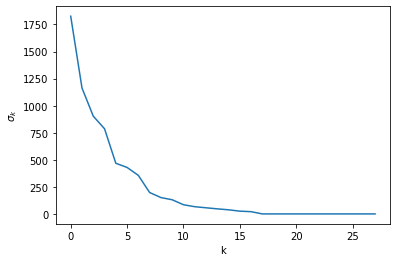

In [30]:
import numpy as np
label = list(y[y['0']==0].index)[0]
data = X.values[label]

data = data.reshape(28,28)
u, s, v = np.linalg.svd(data, full_matrices = True)
plt.plot(s)
plt.xlabel("k")
plt.ylabel("$\sigma_k$")
plt.show()

c) By setting some singular values to 0, plot the approximation of the 0 digit next to the original digit. (5 points)

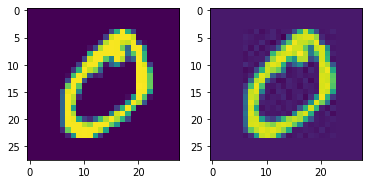

In [31]:
k = 10
approx_0 = u[:,:k] @ np.diag(s[:k]) @ v[:k, :]
fig,(ax1, ax2) = plt.subplots(1,2)
ax1.imshow(data_0)
ax2.imshow(approx_0)

d) Consider the entire dataset as a matrix. Perform SVD and store the dataset approximation in a new `.csv` file. Explain why / how you chose a particular rank. Note: you may not be able to run this on the entire dataset in a reasonable amount of time so you may take a small random sample for this and the following questions. (10 points)

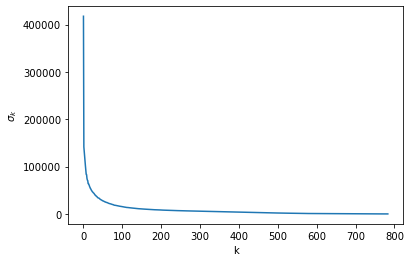

In [32]:
u, s, v = np.linalg.svd(X,full_matrices=False)
plt.plot(s)
plt.xlabel("k")
plt.ylabel("$\sigma_k$")
plt.show()

k = 60

appr = u[:,:k] @ np.diag(s[:k]) @ v[:k, :]
df = pd.DataFrame(appr)
df.to_csv('1d.csv',index = False)

In [ ]:
We want to find where the concavity is and from looking at the graph, that occurs at around k = 60

e) As in homework 2, using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. Note: the centroids should be represented as images. (10 points)

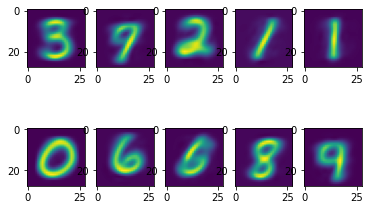

In [36]:
from sklearn.cluster import KMeans
df = pd.read_csv('1d.csv')
kmeans = KMeans(n_clusters=10)
kmeans.fit(df)
centroid = kmeans.cluster_centers_

predicted_label_e=kmeans.fit_predict(df)

centroid = centroid.reshape(10,28,28)
fig,a = plt.subplots(2,5)
num = 0
for x in range(2):
    for y in range(5):
        a[x][y].imshow(centroid[num])
        num+=1

f) Repeat e) on the original dataset (if you used a subset of the dataset, keep using that same subset). Comment on any differences (or lack thereof) you observe. (8 points)

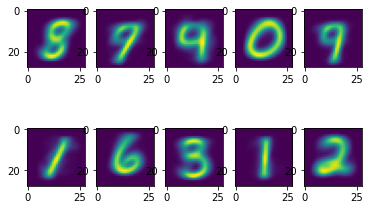

In [37]:
df = X
kmeans = KMeans(n_clusters=10)
kmeans.fit(df)
centroid = kmeans.cluster_centers_

predicted_label_f = kmeans.fit_predict(df)

centroid = centroid.reshape(10,28,28)
fig,a = plt.subplots(2,5)
num = 0
for x in range(2):
    for y in range(5):
        a[x][y].imshow(centroid[num])
        num+=1

In [ ]:
Since there is not a big difference, the rank-k approximation does not lead to any significant data loss.

g) Compare the disagreement distance of the clustering obtained in e) to the true labels, to the disagreement distance of the clustering obtained in f) to the true labels. Comment briefly. (8 points)

In [42]:
def disagreement_dist(P_labels, C_labels):
    d = {'col1': P_labels, 'col2': C_labels}
    df = pd.DataFrame(data=d)
    sum1 = 0
    for x in range(10):
        cluster = df[df['col1']==x]
        list_of_counts = list(cluster['col2'].value_counts())
        for y in range(len(list_of_counts)):
            for z in range(y+1,len(list_of_counts)):
                sum1+=list_of_counts[y]*list_of_counts[z]
    for x in range(10):
        cluster = df[df['col2']==x]
        list_of_counts = list(cluster['col1'].value_counts())
        for y in range(len(list_of_counts)):
            for z in range(y+1,len(list_of_counts)):
                sum1+=list_of_counts[y]*list_of_counts[z]
    return sum1
y = pd.read_csv('y_file.csv')
Actual_label = list(y['0'].values)
Predicted_label_e = list(predicted_label_e)
Predicted_label_f = list(predicted_label_f)
disagreement_distance_e = disagreement_dist(Actual_label, Predicted_label_e)
disagreement_distance_f = disagreement_dist(Actual_label, Predicted_label_f)
print("The disagreement distance in e) is ",disagreement_distance_e)
print("The disagreement distance in f) is ",disagreement_distance_f)
print("The difference is",disagreement_distance_e - disagreement_distance_f)

The disagreement distance in e) is  288841578
The disagreement distance in f) is  283666959
The difference is 5174619


h) Create a matrix that is the difference between the original dataset and the rank-10 approximation of the dataset. (10 points)

In [43]:
orig_data = X
u, s, v = np.linalg.svd(orig_data, full_matrices = False)
k = 10
rank10 = u[:,:k] @ np.diag(s[:k]) @ v[:k, :]
diff = orig_data - rank10
diff.values

array([[-2.62272593e-15, -1.46239334e-12,  2.58812177e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.46363890e-15, -1.40184029e-12,  1.15211539e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.88487181e-16, -3.13453882e-13, -1.19660235e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 6.60028706e-16, -1.17276873e-12, -1.50552232e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.59076933e-16, -9.59225584e-13,  5.59529781e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.02674393e-16, -1.20976691e-12, -2.78620050e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

i) The largest (using euclidean distance from the origin) rows of the matrix could be considered anomalous data points. Briefly explain why. Plot the 10 images responsible for the 10 largest rows. (5 points)

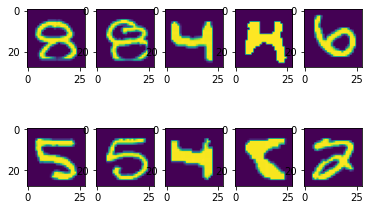

In [44]:
from sklearn.metrics.pairwise import euclidean_distances

orig = [[0 for x in range(784)]]
dist = euclidean_distances(diff, orig)

dist_df = pd.DataFrame(dist)
sorted_dist = list(dist_df.sort_values(by = [0],ascending = False).head(10).index)
largest_r = [X.values[x] for x in range(len(X.values)) if x in sorted_dist]
dist_df.sort_values(by = [0],ascending = False).head(10)

largest_r_reshape = np.reshape(largest_r,(10,28,28))
fig,a = plt.subplots(2,5)
num = 0
for x in range(2):
    for y in range(5):
        a[x][y].imshow(largest_r_reshape[num])
        num+=1

## Exercise 2 (35 points)

a) Modify the code below to pick 4 categories of news articles that you think are minimally related (for example `sci.space` and `rec.sport.baseball`). (3 points)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

categories = ['rec.motorcycles', 'sci.space', 'talk.politics.misc', 'alt.atheism']
news_data = fetch_20newsgroups(subset = 'train', categories = categories)

b) Using the `SnowballStemmer`, stem the words in every article (10 points)

In [46]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stemmed_data = [" ".join(SnowballStemmer("english", ignore_stopwords = True).stem(word)
                      for sent in sent_tokenize(message)
                      for word in word_tokenize(sent))
                      for message in news_data.data]

[nltk_data] Downloading package punkt to /Users/akshad28/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshad28/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


c) Use the `TfidfVectorizer` on the stemmed articles. Set `min_df` and `max_df` to reasonable numbers and briefly explain your reasoning. Store the resulting dataset into a `.csv` file. (7 points)

In [47]:
vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 4, max_df = 0.8)
dtm = vectorizer.fit_transform(stemmed_data)
centered_dtm = dtm - np.mean(dtm, axis = 0)

d) For rank k ranging from 1 to 25:

1. Reduce the dimensionality of the tfidf vectorized data using a dimension reduction technique discussed in class.
2. Apply Kmeans on the reduced dataset to create 4 clusters
3. Record the disagreement distance between the clustering in 2 and the article category

Then plot the recorded disagreement distance per rank. Comment briefly. (15 points)

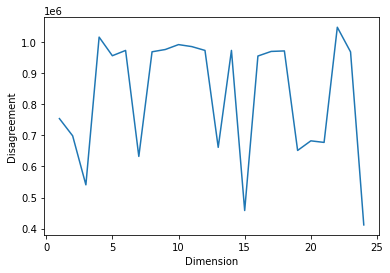

In [48]:
disagreement_distance = []
u, s, v = np.linalg.svd(centered_dtm, full_matrices = False)
for k in range(1, 25):
    dim_reduced_dataset = u[:,:k] @ np.diag(s[:k]) @ v[:k, :]
    kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    kmeans.fit_predict(dim_reduced_dataset)
    labelsk = kmeans.labels_
    disagreement_distance.append(disagreement_dist(labelsk, news_data.target))

plt.plot(range(1,25), disagreement_distance)
plt.ylabel('Disagreement')
plt.xlabel('Dimension')
plt.show()